In [45]:
#IMPORTS

import numpy as np
import random
import tensorflow as tf
import tensorflow.keras as kr
import tensorflow.keras.backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
import os
import csv

from scipy.spatial.distance import euclidean
from sklearn.metrics import confusion_matrix

from time import sleep
from tqdm import tqdm

import copy
import numpy
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from numpy.random import RandomState
import scipy as scp
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.utils import to_categorical
from keras import backend as K
from itertools import product
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

from sklearn import mixture

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
feature_attacked = [3,5,8]
rs = RandomState(92) #To reproduce the same results each time we run this notebook

In [47]:
#Load dataset into a pandas DataFrame
activity = pd.read_csv("D:/explaineblity/activity_3_original.csv", sep=',')

In [48]:
to_drop = ['subject', 'timestamp', 'heart_rate','activityID']
activity.drop(axis=1, columns=to_drop, inplace=True)

In [49]:
display(activity.head())

,motion,temp_hand,acceleration_16_x_hand,acceleration_16_y_hand,acceleration_16_z_hand,acceleration_6_x_hand,acceleration_6_y_hand,acceleration_6_z_hand,gyroscope_x_hand,gyroscope_y_hand,...,acceleration_16_z_ankle,acceleration_6_x_ankle,acceleration_6_y_ankle,acceleration_6_z_ankle,gyroscope_x_ankle,gyroscope_y_ankle,gyroscope_z_ankle,magnetometer_x_ankle,magnetometer_y_ankle,magnetometer_z_ankle
0,n,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,-0.004750,0.037579,...,0.095156,9.63162,-1.76757,0.265761,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696
1,n,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,-0.171710,0.025479,...,-0.020804,9.58649,-1.75247,0.250816,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656
2,n,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,-0.238241,0.011214,...,-0.059173,9.60196,-1.73721,0.356632,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119
3,n,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,-0.192912,0.019053,...,0.094385,9.58674,-1.78264,0.311453,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799
4,n,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,-0.069961,-0.018328,...,0.095775,9.64677,-1.75240,0.295902,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847


In [50]:
activity = pd.concat([activity,pd.get_dummies(activity['motion'], prefix='motion')],axis=1)
activity.drop('motion', axis=1, inplace=True)

In [51]:
display(activity.head())

,temp_hand,acceleration_16_x_hand,acceleration_16_y_hand,acceleration_16_z_hand,acceleration_6_x_hand,acceleration_6_y_hand,acceleration_6_z_hand,gyroscope_x_hand,gyroscope_y_hand,gyroscope_z_hand,...,acceleration_6_y_ankle,acceleration_6_z_ankle,gyroscope_x_ankle,gyroscope_y_ankle,gyroscope_z_ankle,magnetometer_x_ankle,magnetometer_y_ankle,magnetometer_z_ankle,motion_n,motion_y
0,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,-0.004750,0.037579,-0.011145,...,-1.76757,0.265761,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,1,0
1,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,-0.171710,0.025479,-0.009538,...,-1.75247,0.250816,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656,1,0
2,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,-0.238241,0.011214,0.000831,...,-1.73721,0.356632,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119,1,0
3,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,-0.192912,0.019053,0.013374,...,-1.78264,0.311453,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799,1,0
4,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,-0.069961,-0.018328,0.004582,...,-1.75240,0.295902,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1,0


In [52]:
class_label = [ 'motion_n', 'motion_y']
predictors = [a for a in activity.columns.values if a not in class_label]

for p in predictors:
    activity[p].fillna(activity[p].mean(), inplace=True)

display(predictors)
for p in predictors:
    activity[p] = (activity[p]-activity[p].min()) / (activity[p].max() - activity[p].min())
    activity[p].astype('float32')
    

['temp_hand',
 'acceleration_16_x_hand',
 'acceleration_16_y_hand',
 'acceleration_16_z_hand',
 'acceleration_6_x_hand',
 'acceleration_6_y_hand',
 'acceleration_6_z_hand',
 'gyroscope_x_hand',
 'gyroscope_y_hand',
 'gyroscope_z_hand',
 'magnetometer_x_hand',
 'magnetometer_y_hand',
 'magnetometer_z_hand',
 'temp_chest',
 'acceleration_16_x_chest',
 'acceleration_16_y_chest',
 'acceleration_16_z_chest',
 'acceleration_6_x_chest',
 'acceleration_6_y_chest',
 'acceleration_6_z_chest',
 'gyroscope_x_chest',
 'gyroscope_y_chest',
 'gyroscope_z_chest',
 'magnetometer_x_chest',
 'magnetometer_y_chest',
 'magnetometer_z_chest',
 'temp_ankle',
 'acceleration_16_x_ankle',
 'acceleration_16_y_ankle',
 'acceleration_16_z_ankle',
 'acceleration_6_x_ankle',
 'acceleration_6_y_ankle',
 'acceleration_6_z_ankle',
 'gyroscope_x_ankle',
 'gyroscope_y_ankle',
 'gyroscope_z_ankle',
 'magnetometer_x_ankle',
 'magnetometer_y_ankle',
 'magnetometer_z_ankle']

In [53]:
activity = activity.to_numpy()

In [54]:
activity.shape

(1942872, 41)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(activity[:,:-2],activity[:,-2:], test_size=0.07, random_state=rs)


In [56]:
#begin federated

earlystopping = EarlyStopping(monitor = 'val_loss',
                              min_delta = 0.01,
                              patience = 50,
                              verbose = 1,
                              baseline = 2,
                              restore_best_weights = True)

checkpoint = ModelCheckpoint('test.h8',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)
    
model = Sequential()
model.add(Dense(70, input_dim=39, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))
#sgd = optimizers.SGD(learning_rate=0.0001, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
# def train_shard(i):
history = model.fit(X_train, y_train,
epochs=2,
validation_data=(X_test, y_test),
callbacks = [checkpoint, earlystopping],
shuffle=True)
# return history
# for i in range(len(shard1_traintest)):
#     train_shard(i)
#get_3rd_layer_output = K.function([model.layers[0].input],
#                                 [model.layers[2].output])
#layer_output = get_3rd_layer_output(shard_traintest[i]["X_train"])[0]

Train on 1806870 samples, validate on 136002 samples
Epoch 1/2


 468416/1806870 [======>.......................] - ETA: 1:54:54 - loss: 0.6740 - accuracy: 0.625 - ETA: 2:24 - loss: 0.6243 - accuracy: 0.6502  - ETA: 1:29 - loss: 0.5579 - accuracy: 0.71 - ETA: 1:09 - loss: 0.4978 - accuracy: 0.75 - ETA: 1:00 - loss: 0.4544 - accuracy: 0.78 - ETA: 55s - loss: 0.4229 - accuracy: 0.8029 - ETA: 52s - loss: 0.3976 - accuracy: 0.816 - ETA: 49s - loss: 0.3798 - accuracy: 0.826 - ETA: 47s - loss: 0.3648 - accuracy: 0.834 - ETA: 46s - loss: 0.3515 - accuracy: 0.841 - ETA: 45s - loss: 0.3383 - accuracy: 0.847 - ETA: 44s - loss: 0.3275 - accuracy: 0.854 - ETA: 43s - loss: 0.3230 - accuracy: 0.856 - ETA: 42s - loss: 0.3164 - accuracy: 0.859 - ETA: 41s - loss: 0.3093 - accuracy: 0.863 - ETA: 41s - loss: 0.3022 - accuracy: 0.867 - ETA: 40s - loss: 0.2951 - accuracy: 0.870 - ETA: 40s - loss: 0.2895 - accuracy: 0.873 - ETA: 39s - loss: 0.2853 - accuracy: 0.875 - ETA: 39s - loss: 0.2801 - accuracy: 0.878 - ETA: 39s - loss: 0.2769 - accuracy: 0.879 - ETA: 38s - loss: 

 948576/1806870 [==============>...............] - ETA: 26s - loss: 0.1380 - accuracy: 0.948 - ETA: 26s - loss: 0.1379 - accuracy: 0.948 - ETA: 26s - loss: 0.1377 - accuracy: 0.948 - ETA: 26s - loss: 0.1374 - accuracy: 0.948 - ETA: 26s - loss: 0.1372 - accuracy: 0.948 - ETA: 26s - loss: 0.1369 - accuracy: 0.948 - ETA: 26s - loss: 0.1366 - accuracy: 0.948 - ETA: 26s - loss: 0.1363 - accuracy: 0.948 - ETA: 26s - loss: 0.1360 - accuracy: 0.948 - ETA: 25s - loss: 0.1357 - accuracy: 0.949 - ETA: 25s - loss: 0.1354 - accuracy: 0.949 - ETA: 25s - loss: 0.1352 - accuracy: 0.949 - ETA: 25s - loss: 0.1350 - accuracy: 0.949 - ETA: 25s - loss: 0.1347 - accuracy: 0.949 - ETA: 25s - loss: 0.1344 - accuracy: 0.949 - ETA: 25s - loss: 0.1341 - accuracy: 0.949 - ETA: 25s - loss: 0.1340 - accuracy: 0.949 - ETA: 25s - loss: 0.1337 - accuracy: 0.950 - ETA: 25s - loss: 0.1335 - accuracy: 0.950 - ETA: 25s - loss: 0.1333 - accuracy: 0.950 - ETA: 25s - loss: 0.1331 - accuracy: 0.950 - ETA: 25s - loss: 0.1328 -

1435872/1806870 [======================>.......] - ETA: 16s - loss: 0.1057 - accuracy: 0.961 - ETA: 16s - loss: 0.1055 - accuracy: 0.961 - ETA: 16s - loss: 0.1055 - accuracy: 0.961 - ETA: 16s - loss: 0.1054 - accuracy: 0.961 - ETA: 16s - loss: 0.1052 - accuracy: 0.961 - ETA: 16s - loss: 0.1051 - accuracy: 0.961 - ETA: 16s - loss: 0.1050 - accuracy: 0.961 - ETA: 16s - loss: 0.1048 - accuracy: 0.961 - ETA: 16s - loss: 0.1047 - accuracy: 0.962 - ETA: 16s - loss: 0.1046 - accuracy: 0.962 - ETA: 16s - loss: 0.1045 - accuracy: 0.962 - ETA: 16s - loss: 0.1043 - accuracy: 0.962 - ETA: 16s - loss: 0.1043 - accuracy: 0.962 - ETA: 16s - loss: 0.1041 - accuracy: 0.962 - ETA: 16s - loss: 0.1041 - accuracy: 0.962 - ETA: 15s - loss: 0.1039 - accuracy: 0.962 - ETA: 15s - loss: 0.1038 - accuracy: 0.962 - ETA: 15s - loss: 0.1037 - accuracy: 0.962 - ETA: 15s - loss: 0.1035 - accuracy: 0.962 - ETA: 15s - loss: 0.1034 - accuracy: 0.962 - ETA: 15s - loss: 0.1033 - accuracy: 0.962 - ETA: 15s - loss: 0.1031 -

1806870/1806870 [==============================] - ETA: 7s - loss: 0.0874 - accuracy: 0.96 - ETA: 7s - loss: 0.0873 - accuracy: 0.96 - ETA: 7s - loss: 0.0873 - accuracy: 0.96 - ETA: 7s - loss: 0.0872 - accuracy: 0.96 - ETA: 6s - loss: 0.0871 - accuracy: 0.96 - ETA: 6s - loss: 0.0870 - accuracy: 0.96 - ETA: 6s - loss: 0.0870 - accuracy: 0.96 - ETA: 6s - loss: 0.0869 - accuracy: 0.96 - ETA: 6s - loss: 0.0868 - accuracy: 0.96 - ETA: 6s - loss: 0.0867 - accuracy: 0.96 - ETA: 6s - loss: 0.0867 - accuracy: 0.96 - ETA: 6s - loss: 0.0866 - accuracy: 0.96 - ETA: 6s - loss: 0.0866 - accuracy: 0.96 - ETA: 6s - loss: 0.0865 - accuracy: 0.96 - ETA: 6s - loss: 0.0864 - accuracy: 0.96 - ETA: 6s - loss: 0.0863 - accuracy: 0.96 - ETA: 6s - loss: 0.0863 - accuracy: 0.96 - ETA: 6s - loss: 0.0862 - accuracy: 0.96 - ETA: 6s - loss: 0.0861 - accuracy: 0.96 - ETA: 6s - loss: 0.0860 - accuracy: 0.96 - ETA: 6s - loss: 0.0860 - accuracy: 0.96 - ETA: 6s - loss: 0.0859 - accuracy: 0.96 - ETA: 6s - loss: 0.0858 - 

 474496/1806870 [======>.......................] - ETA: 51:48 - loss: 0.0022 - accuracy: 1.000 - ETA: 1:13 - loss: 0.0302 - accuracy: 0.990 - ETA: 53s - loss: 0.0260 - accuracy: 0.9923 - ETA: 47s - loss: 0.0219 - accuracy: 0.993 - ETA: 43s - loss: 0.0236 - accuracy: 0.993 - ETA: 41s - loss: 0.0304 - accuracy: 0.991 - ETA: 40s - loss: 0.0327 - accuracy: 0.990 - ETA: 39s - loss: 0.0327 - accuracy: 0.990 - ETA: 38s - loss: 0.0317 - accuracy: 0.990 - ETA: 38s - loss: 0.0308 - accuracy: 0.990 - ETA: 37s - loss: 0.0303 - accuracy: 0.990 - ETA: 37s - loss: 0.0307 - accuracy: 0.990 - ETA: 37s - loss: 0.0311 - accuracy: 0.990 - ETA: 36s - loss: 0.0312 - accuracy: 0.990 - ETA: 36s - loss: 0.0306 - accuracy: 0.990 - ETA: 36s - loss: 0.0319 - accuracy: 0.989 - ETA: 36s - loss: 0.0315 - accuracy: 0.989 - ETA: 35s - loss: 0.0318 - accuracy: 0.989 - ETA: 35s - loss: 0.0317 - accuracy: 0.989 - ETA: 35s - loss: 0.0317 - accuracy: 0.989 - ETA: 35s - loss: 0.0323 - accuracy: 0.989 - ETA: 35s - loss: 0.03

 949216/1806870 [==============>...............] - ETA: 25s - loss: 0.0300 - accuracy: 0.989 - ETA: 25s - loss: 0.0300 - accuracy: 0.989 - ETA: 25s - loss: 0.0301 - accuracy: 0.989 - ETA: 25s - loss: 0.0300 - accuracy: 0.989 - ETA: 25s - loss: 0.0300 - accuracy: 0.989 - ETA: 25s - loss: 0.0299 - accuracy: 0.989 - ETA: 25s - loss: 0.0299 - accuracy: 0.989 - ETA: 25s - loss: 0.0299 - accuracy: 0.989 - ETA: 25s - loss: 0.0299 - accuracy: 0.989 - ETA: 25s - loss: 0.0299 - accuracy: 0.989 - ETA: 25s - loss: 0.0298 - accuracy: 0.989 - ETA: 25s - loss: 0.0299 - accuracy: 0.989 - ETA: 25s - loss: 0.0298 - accuracy: 0.989 - ETA: 25s - loss: 0.0299 - accuracy: 0.989 - ETA: 25s - loss: 0.0299 - accuracy: 0.989 - ETA: 25s - loss: 0.0299 - accuracy: 0.989 - ETA: 25s - loss: 0.0298 - accuracy: 0.989 - ETA: 25s - loss: 0.0297 - accuracy: 0.989 - ETA: 25s - loss: 0.0296 - accuracy: 0.989 - ETA: 25s - loss: 0.0296 - accuracy: 0.989 - ETA: 24s - loss: 0.0297 - accuracy: 0.989 - ETA: 24s - loss: 0.0296 -

1434176/1806870 [======================>.......] - ETA: 16s - loss: 0.0268 - accuracy: 0.990 - ETA: 16s - loss: 0.0268 - accuracy: 0.990 - ETA: 16s - loss: 0.0268 - accuracy: 0.990 - ETA: 16s - loss: 0.0267 - accuracy: 0.991 - ETA: 16s - loss: 0.0267 - accuracy: 0.991 - ETA: 16s - loss: 0.0267 - accuracy: 0.991 - ETA: 16s - loss: 0.0266 - accuracy: 0.991 - ETA: 16s - loss: 0.0266 - accuracy: 0.991 - ETA: 16s - loss: 0.0266 - accuracy: 0.991 - ETA: 16s - loss: 0.0266 - accuracy: 0.991 - ETA: 16s - loss: 0.0266 - accuracy: 0.991 - ETA: 16s - loss: 0.0266 - accuracy: 0.991 - ETA: 16s - loss: 0.0266 - accuracy: 0.991 - ETA: 16s - loss: 0.0265 - accuracy: 0.991 - ETA: 16s - loss: 0.0265 - accuracy: 0.991 - ETA: 15s - loss: 0.0265 - accuracy: 0.991 - ETA: 15s - loss: 0.0265 - accuracy: 0.991 - ETA: 15s - loss: 0.0265 - accuracy: 0.991 - ETA: 15s - loss: 0.0264 - accuracy: 0.991 - ETA: 15s - loss: 0.0264 - accuracy: 0.991 - ETA: 15s - loss: 0.0264 - accuracy: 0.991 - ETA: 15s - loss: 0.0264 -

1806870/1806870 [==============================] - ETA: 7s - loss: 0.0243 - accuracy: 0.99 - ETA: 7s - loss: 0.0243 - accuracy: 0.99 - ETA: 7s - loss: 0.0243 - accuracy: 0.99 - ETA: 7s - loss: 0.0243 - accuracy: 0.99 - ETA: 7s - loss: 0.0243 - accuracy: 0.99 - ETA: 6s - loss: 0.0243 - accuracy: 0.99 - ETA: 6s - loss: 0.0243 - accuracy: 0.99 - ETA: 6s - loss: 0.0242 - accuracy: 0.99 - ETA: 6s - loss: 0.0242 - accuracy: 0.99 - ETA: 6s - loss: 0.0242 - accuracy: 0.99 - ETA: 6s - loss: 0.0242 - accuracy: 0.99 - ETA: 6s - loss: 0.0242 - accuracy: 0.99 - ETA: 6s - loss: 0.0242 - accuracy: 0.99 - ETA: 6s - loss: 0.0242 - accuracy: 0.99 - ETA: 6s - loss: 0.0242 - accuracy: 0.99 - ETA: 6s - loss: 0.0241 - accuracy: 0.99 - ETA: 6s - loss: 0.0241 - accuracy: 0.99 - ETA: 6s - loss: 0.0241 - accuracy: 0.99 - ETA: 6s - loss: 0.0241 - accuracy: 0.99 - ETA: 6s - loss: 0.0241 - accuracy: 0.99 - ETA: 6s - loss: 0.0241 - accuracy: 0.99 - ETA: 6s - loss: 0.0241 - accuracy: 0.99 - ETA: 6s - loss: 0.0241 - 

In [57]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 70)                2800      
_________________________________________________________________
dense_14 (Dense)             (None, 50)                3550      
_________________________________________________________________
dense_15 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_16 (Dense)             (None, 2)                 102       
Total params: 9,002
Trainable params: 9,002
Non-trainable params: 0
_________________________________________________________________


In [58]:
#AUXILIARY METHODS FOR FEDERATED LEARNING

# RETURN INDICES TO LAYERS WITH WEIGHTS AND BIASES
def trainable_layers(model):
    return [i for i, layer in enumerate(model.layers) if len(layer.get_weights()) > 0]

# RETURN WEIGHTS AND BIASES OF A MODEL
def get_parameters(model):
    weights = []
    biases = []
    index = trainable_layers(model)
    for i in index:
        weights.append(copy.deepcopy(model.layers[i].get_weights()[0]))
        biases.append(copy.deepcopy(model.layers[i].get_weights()[1]))           
    
    return weights, biases
        
# SET WEIGHTS AND BIASES OF A MODEL
def set_parameters(model, weights, biases):
    index = trainable_layers(model)
    for i, j in enumerate(index):
        model.layers[j].set_weights([weights[i], biases[i]])
    
# DEPRECATED: RETURN THE GRADIENTS OF THE MODEL AFTER AN UPDATE 
def get_gradients(model, inputs, outputs):
    """ Gets gradient of model for given inputs and outputs for all weights"""
    grads = model.optimizer.get_gradients(model.total_loss, model.trainable_weights)
    symb_inputs = (model._feed_inputs + model._feed_targets + model._feed_sample_weights)
    f = K.function(symb_inputs, grads)
    x, y, sample_weight = model._standardize_user_data(inputs, outputs)
    output_grad = f(x + y + sample_weight)
    
    w_grad = [w for i,w in enumerate(output_grad) if i%2==0]
    b_grad = [w for i,w in enumerate(output_grad) if i%2==1]
    
    return w_grad, b_grad

# RETURN THE DIFFERENCE OF MODELS' WEIGHTS AND BIASES AFTER AN UPDATE 
# NOTE: LEARNING RATE IS APPLIED, SO THE UPDATE IS DIFFERENT FROM THE
# GRADIENTS. IN CASE VANILLA SGD IS USED, THE GRADIENTS ARE OBTAINED
# AS (UPDATES / LEARNING_RATE)
def get_updates(model, inputs, outputs, batch_size, epochs):
    w, b = get_parameters(model)
    #model.train_on_batch(inputs, outputs)
    model.fit(inputs, outputs, batch_size=batch_size, epochs=epochs, verbose=0)
    w_new, b_new = get_parameters(model)
    
    weight_updates = [old - new for old,new in zip(w, w_new)]
    bias_updates = [old - new for old,new in zip(b, b_new)]
    
    return weight_updates, bias_updates

# UPDATE THE MODEL'S WEIGHTS AND PARAMETERS WITH AN UPDATE
def apply_updates(model, eta, w_new, b_new):
    w, b = get_parameters(model)
    new_weights = [theta - eta*delta for theta,delta in zip(w, w_new)]
    new_biases = [theta - eta*delta for theta,delta in zip(b, b_new)]
    set_parameters(model, new_weights, new_biases)
    
# FEDERATED AGGREGATION FUNCTION
def aggregate(n_layers, n_peers, f, w_updates, b_updates):
    agg_w = [f([w_updates[j][i] for j in range(n_peers)], axis=0) for i in range(n_layers)]
    agg_b = [f([b_updates[j][i] for j in range(n_peers)], axis=0) for i in range(n_layers)]
    return agg_w, agg_b

# SOLVE NANS
def nans_to_zero(W, B):
    W0 = [np.nan_to_num(w, nan=0.0, posinf=0.0, neginf=0.0) for w in W]
    B0 = [np.nan_to_num(b, nan=0.0, posinf=0.0, neginf=0.0) for b in B]
    return W0, B0

def build_forest(X,y):
    clf=RandomForestClassifier(n_estimators=1000, max_depth=7, random_state=0, verbose = 1)
    clf.fit(X,y)
    return clf
    

In [59]:

def scan_wrong(forest_predictions, FL_predict1, forest , y_test_local, X_test_local):
    sum_feature_improtance= 0
    overal_wrong_feature_importance = 0
    counter = 0
    second_counter = 0
    never_seen = 0
    avr_wrong_importance = 0
    counter1 = 0
    for i in range (len(FL_predict1)):
        if(FL_predict1[i][0] < 0.5):
            FL_predict1[i][0] = 0
            FL_predict1[i][1] = 1
        if(FL_predict1[i][0] >= 0.5):
            FL_predict1[i][0] = 1
            FL_predict1[i][1] = 0
    for i in range (len(FL_predict1)):
        i_tree = 0
    #     print(i)
        if (FL_predict1[i][0] != y_test_local[i][0]):
            counter1+=1
#             print(i)
        #         print("the test sample number ",i ," have been niss classified by the blackbox" )
            for tree_in_forest in forest.estimators_:
                temp = forest.estimators_[i_tree].predict([X_test_local[i]])
                i_tree = i_tree + 1
                inttemp = temp[0].astype(int)
                if(FL_predict1[i][0] == inttemp[0]):
                    sum_feature_improtance = sum_feature_improtance + tree_in_forest.feature_importances_
                    counter = counter + 1
        if(counter>0):
            ave_feature_importence = sum_feature_improtance/counter
            overal_wrong_feature_importance = ave_feature_importence + overal_wrong_feature_importance
            second_counter = second_counter + 1
#             print(ave_feature_importence)
#             print("numbers of the trees predect the wrong predection as the blackbox is ", counter)
            counter = 0
            sum_feature_improtance = 0
        #         print("------------------------------------------------------------------------------------")
        else:
            if(FL_predict1[i][0] != y_test_local[i][0]):
        #       print("the test sample number ", i," never have been miss classified by the forest.")
                never_seen = never_seen +1
    if(second_counter>0):
#         print(second_counter)
    #         print("the number of sampels that was miss classifed by the blackbox and classified correctly by the all forest is", never_seen)
        #     print(overal_wrong_feature_importance)
        avr_wrong_importance = overal_wrong_feature_importance / second_counter
    #         print("the average wrong dessition cosed by the feature", avr_wrong_importance)
    #         print("=====================================================================================")
    print("the number of miss classified sampels is ", counter1)
    return forest.feature_importances_

In [60]:
def attack_data(inputs, feature_attacked):
    z=0
    C=0
    z=inputs.max(axis = 0)
    C=inputs.min(axis = 0)
    for i in range(len(inputs)):
        for j in range(len(inputs[0])):
            inputs[i][j]= random.uniform(z[j], C[j])
#         inputs[i][feature_attacked[1]]= random.uniform(z[feature_attacked[1]], C[feature_attacked[1]])        
#         inputs[i][feature_attacked[1]]= random.uniform(z[feature_attacked[1]], C[feature_attacked[1]])
#         inputs[i][feature_attacked] = random.randrange(z[feature_attacked]+1)
#         print(X_test_attacked[i][att])
#         if(X_test_attacked[i][att] == X_test[i][att]):
#             feat_same = feat_same + 1
    return inputs

In [61]:
trainable_layers(model)

[0, 1, 2, 3]

In [62]:
get_updates(model, X_train, y_train, 32, 2)

([array([[-0.19031775,  0.06523454, -0.14931396, ...,  0.        ,
           0.        , -0.29390967],
         [ 0.033116  , -0.08946543,  0.01096467, ...,  0.        ,
           0.        , -0.015468  ],
         [ 0.01199894,  0.02766883,  0.01122332, ...,  0.        ,
           0.        , -0.0217886 ],
         ...,
         [-0.00909673, -0.04540771, -0.20296723, ...,  0.        ,
           0.        , -0.13601643],
         [-0.2878099 ,  0.23572141,  0.23246315, ...,  0.        ,
           0.        ,  0.10910301],
         [ 0.20305228,  0.28390008,  0.5178579 , ...,  0.        ,
           0.        , -0.20772421]], dtype=float32),
  array([[ 0.03976321,  0.00334442, -0.1938284 , ...,  0.12357424,
           0.        , -0.4720744 ],
         [-0.05385096, -0.19503492, -0.11490272, ..., -0.06129656,
           0.        , -0.07149667],
         [ 0.09047867, -0.00144058, -0.30648926, ..., -0.06290518,
           0.        , -0.20281315],
         ...,
         [ 0.      

In [63]:
W = get_parameters(model)[0]
B = get_parameters(model)[1]

In [64]:
#AUXILIARY METHODS FOR FL INSPECTION

# TRANSFORM ALL WEIGHT TENSORS TO 1D ARRAY
def flatten_weights(w_in):
    h = w_in[0].reshape(-1)
    for w in w_in[1:]:
        h = np.append(h, w.reshape(-1))
    return h

# TRANSFORM ALL BIAS TENSORS TO 1D ARRAY
def flatten_biases(b_in):
    h = b_in[0].reshape(-1)
    for b in b_in[1:]:
        h = np.append(h, b.reshape(-1))
    return h

# TRANSFORM WEIGHT AND BIAS TENSORS TO 1D ARRAY
def flatten_parameters(w_in, b_in):
    w = flatten_weights(w_in)
    b = flatten_biases(b_in)
    return w, b

# COMPUTE EUCLIDEAN DISTANCE OF WEIGHTS
def dist_weights(w_a, w_b):
    wf_a = flatten_weights(w_a)
    wf_b = flatten_weights(w_b)
    return euclidean(wf_a, wf_b)

# COMPUTE EUCLIDEAN DISTANCE OF BIASES
def dist_biases(b_a, b_b):
    bf_a = flatten_biases(b_a)
    bf_b = flatten_biases(b_b)
    return euclidean(bf_a, bf_b)

# COMPUTE EUCLIDEAN DISTANCE OF WEIGHTS AND BIASES
def dist_parameters(w_a, b_a, w_b, b_b):
    wf_a, bf_a = flatten_parameters(w_a, b_a)
    wf_b, bf_b = flatten_parameters(w_b, b_b)
    return euclidean(np.append(wf_a, bf_a), np.append(wf_b, bf_b))

In [65]:
len(W[0])

39

In [66]:
# BASELINE SCENARIO
#buid the model as base line for the shards (sequential)
# Number of peers
#accordin to what we need
n_peers = 100
ss = int(len(X_train)/n_peers)
inputs_in = X_train[0*ss:0*ss+ss]
outputs_in = y_train[0*ss:0*ss+ss]
def build_model(X_t, y_t):
    model = Sequential()
    model.add(Dense(70, input_dim=39, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    #sgd = optimizers.SGD(learning_rate=0.0001, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
    model.fit(X_t,
              y_t,        
        #inputs_in, 
              #outputs_in, 
#               X_train,
#               y_train,
              batch_size=32, 
              epochs=100, 
              verbose=1,
              validation_data=((X_test, y_test)))
    return model

# model = build_model(inputs_in, outputs_in)

In [67]:
display(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 70)                2800      
_________________________________________________________________
dense_14 (Dense)             (None, 50)                3550      
_________________________________________________________________
dense_15 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_16 (Dense)             (None, 2)                 102       
Total params: 9,002
Trainable params: 9,002
Non-trainable params: 0
_________________________________________________________________


None

In [68]:
# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)

In [69]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1))
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1))
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1))
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1))
print('F1 score: %f' % f1)

Accuracy: 0.998316
Precision: 0.998423
Recall: 0.998711
F1 score: 0.998567


array([[55991,   126],
       [  103, 79782]], dtype=int64)

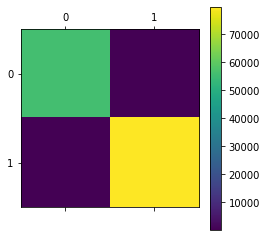

In [70]:
# ROC AUC
# auc = roc_auc_score(shard1_traintest[i]["y_test"], yhat_probs)
# print('ROC AUC: %f' % auc)
# confusion matrix
mat = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1))

display(mat)
plt.matshow(mat);
plt.colorbar()
plt.show()


In [71]:
def savecsv(lists, filename):
    #print lists
    if os.path.isfile(filename):
        os.remove(filename)
    with open(filename, 'a') as csvfile:
        w = csv.DictWriter(csvfile, lists.keys())
        w.writeheader()
        w.writerow(lists)
#         fwriter = csv.writer(csvfile, delimiter=',',lineterminator='\n')
#         fwriter.writerows(lists)
        csvfile.close()
        
        
#         import csv

# my_dict = {"test": 1, "testing": 2}

# with open('mycsvfile.csv', 'wb') as f:  # Just use 'w' mode in 3.x
#     w = csv.DictWriter(f, my_dict.keys())
#     w.writeheader()
#     w.writerow(my_dict)

In [72]:
FI_dic1= {0:[],1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[]}#,10:[],11:[],12:[],13:[],14:[],15:[],16:[],17:[],18:[],19:[],20:[],
#          21:[],22:[],23:[],24:[],25:[],26:[],27:[],28:[],29:[]}
FI_dic2= {0:[],1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[]}#,10:[],11:[],12:[],13:[],14:[],15:[],16:[],17:[],18:[],19:[],20:[],
#          21:[],22:[],23:[],24:[],25:[],26:[],27:[],28:[],29:[]}
# FI_dic3= {0:[],1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[],10:[],11:[],12:[],13:[],14:[],15:[],16:[],17:[],18:[],19:[],20:[],
#          21:[],22:[],23:[],24:[],25:[],26:[],27:[],28:[],29:[]}
# FI_dic4= {0:[],1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[],10:[],11:[],12:[],13:[],14:[],15:[],16:[],17:[],18:[],19:[],20:[],
#          21:[],22:[],23:[],24:[],25:[],26:[],27:[],28:[],29:[]}
# FI_dic5= {0:[],1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[],10:[],11:[],12:[],13:[],14:[],15:[],16:[],17:[],18:[],19:[],20:[],
#          21:[],22:[],23:[],24:[],25:[],26:[],27:[],28:[],29:[]}
# FI_dic6= {0:[],1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[],10:[],11:[],12:[],13:[],14:[],15:[],16:[],17:[],18:[],19:[],20:[],
#          21:[],22:[],23:[],24:[],25:[],26:[],27:[],28:[],29:[]}
# FI_dic7= {0:[],1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[],10:[],11:[],12:[],13:[],14:[],15:[],16:[],17:[],18:[],19:[],20:[],
#          21:[],22:[],23:[],24:[],25:[],26:[],27:[],28:[],29:[]}
# FI_dic8= {0:[],1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[],10:[],11:[],12:[],13:[],14:[],15:[],16:[],17:[],18:[],19:[],20:[],
#          21:[],22:[],23:[],24:[],25:[],26:[],27:[],28:[],29:[]}
# FI_dic9= {0:[],1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[],10:[],11:[],12:[],13:[],14:[],15:[],16:[],17:[],18:[],19:[],20:[],
#          21:[],22:[],23:[],24:[],25:[],26:[],27:[],28:[],29:[]}
# FI_dic10= {0:[],1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[],10:[],11:[],12:[],13:[],14:[],15:[],16:[],17:[],18:[],19:[],20:[],
#          21:[],22:[],23:[],24:[],25:[],26:[],27:[],28:[],29:[]}
# FI_dic11= {0:[],1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[],10:[],11:[],12:[],13:[],14:[],15:[],16:[],17:[],18:[],19:[],20:[],
#          21:[],22:[],23:[],24:[],25:[],26:[],27:[],28:[],29:[],30:[]}
dic = {0:[],1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[],10:[],11:[],12:[],13:[],14:[],15:[],16:[],17:[]}

In [73]:
# FL Begain
# TESTBED

#####################
# SYSTEM PARAMETERS #
#####################
for c in range(1):
    number_attackers = c
    # threshold = 0.011
    threshold =0.00034
    counter = 0 
    peers_selected=random.sample(range(n_peers), number_attackers+1)
    scaner = peers_selected[0]
    mal = peers_selected[1 :]
    # Percentage and number of peers participating at each global training epoch
    percentage_participants = 1.0
    n_participants = int(n_peers * percentage_participants)

    # Number of global training epochs
    n_rounds = 10
    start_attack_round = 4
    end_attack_round = 7
    # Number of local training epochs per global training epoch
    n_local_rounds = 5

    # Local batch size
    local_batch_size = 32

    # Local learning rate
    local_lr = 0.001

    # Global learning rate or 'gain'
    model_substitution_rate = 1.0

    # Attack detection / prevention mechanism = {None, 'distance', 'median', 'accuracy', 'krum'}
    discard_outliers = None

    # Used in 'dist' attack detection, defines how far the outliers are (1.5 is a typical value)
    tau = 1.5

    # Used in 'accuracy' attack detection, defines the error margin for the accuracy improvement
    sensitivity = 0.05

    # Used in 'krum' attack detection, defines how many byzantine attackers we want to defend against
    tolerance=4

    # Prevent suspicious peers from participating again, only valid for 'dist' and 'accuracy'
    ban_malicious = False

    # Clear nans and infinites in model updates
    clear_nans = True

    number_for_threshold1 = numpy.empty(20, dtype=float)
    number_for_threshold2 = numpy.empty(20, dtype=float)
    for r in range(len(number_for_threshold1)):
        number_for_threshold1[r] = 0
        number_for_threshold2[r] = 0

    ########################
    # ATTACK CONFIGURATION #
    ########################

    # Percentage of malicious peers
    r_malicious_peers = 0.0

    # Number of malicious peers (absolute or relative to total number of peers)
    n_malicious_peers = int(n_peers * r_malicious_peers)
    #n_malicious_peers = 1

    # Malicious peers
    malicious_peer = range(n_malicious_peers)

    # Target for coalitions
    common_attack_target = [4,7]

    # Target class of the attack, per each malicious peer
    malicious_targets = dict([(p, t) for p,t in zip(malicious_peer, [common_attack_target]*n_malicious_peers)])

    # Boosting parameter per each malicious peer
    common_malicious_boost = 12
    malicious_boost = dict([(p, b) for p,b in zip(malicious_peer, [common_malicious_boost]*n_malicious_peers)])

    ###########
    # METRICS #
    ###########
    metrics = {'accuracy': [],
              'atk_effectivity': [],
              'update_distances': [],
              'outliers_detected': [],

              'acc_no_target': []}

    ####################################
    # MODEL AND NETWORK INITIALIZATION #
    ####################################
    inputs = X_train[0*ss:0*ss+ss]
    outputs = y_train[0*ss:0*ss+ss]
    global_model = build_model(inputs,outputs)
    n_layers = len(trainable_layers(global_model))

    print('Initializing network.')
    sleep(1)
    network = []
    for i in tqdm(range(n_peers)):
        ss = int(len(X_train)/n_peers)
        inputs = X_train[i*ss:i*ss+ss]
        outputs = y_train[i*ss:i*ss+ss]
    #     network.append(build_model(inputs, outputs))
        network.append(global_model)


    banned_peers = set()

    ##################
    # BEGIN TRAINING #
    ##################
    for t in range(n_rounds):
        print(f'Round {t+1}.')
        sleep(1)

        ## SERVER SIDE #################################################################
        # Fetch global model parameters
        global_weights, global_biases = get_parameters(global_model)

        if clear_nans:
            global_weights, global_biases = nans_to_zero(global_weights, global_biases)

        # Initialize peer update lists
        network_weight_updates = []
        network_bias_updates = []

        # Selection of participant peers in this global training epoch
        if ban_malicious:
            good_peers = list([p for i,p in enumerate(network) if i not in banned_peers])
            n_participants = n_participants if n_participants <= len(good_peers) else int(len(good_peers) * percentage_participants)
            participants = random.sample(list(enumerate(good_peers)), n_participants)
        else:
            participants = random.sample(list(enumerate(network)),n_participants)
        ################################################################################


        ## CLIENT SIDE #################################################################
        for i, local_model in tqdm(participants):

            # Update local model with global parameters 
            set_parameters(local_model, global_weights, global_biases)

            # Initialization of user data
            ss = int(len(X_train)/n_peers)
            inputs = X_train[i*ss:i*ss+ss]
            outputs = y_train[i*ss:i*ss+ss]

    #         print("worker number ", i," from ", n_peers)
    #         print(" number of data in worker ", i ," is ", len(inputs))


    #         do the forest here




    #         counter = counter+1

            if(i == scaner):
                X_train_local, X_test_local, y_train_local, y_test_local = train_test_split(inputs,outputs, test_size=0.7, random_state=rs)
                inputs = X_train_local
                outputs = y_train_local
                if(t == 0):
                    forest = build_forest(X_train_local,y_train_local)
                forest_predictions = forest.predict(X_test_local)
                acc_forest = np.mean([t==p for t,p in zip(y_test_local, forest_predictions)])
    #             imp = forest.feature_importances_
    #             FI_dic1[t] = imp
                FL_predict1 = global_model.predict(X_test_local)
                imp = scan_wrong(forest_predictions, FL_predict1, forest , y_test_local, X_test_local)
                FI_dic1[t] = imp
#                 if(t > 0):
#                     different_rouneds = FI_dic1[t-1] - FI_dic1[t]
#                     different_rouneds = abs(different_rouneds)
#                     number_for_threshold=0
#                     print("lenght of different ",len(different_rouneds))
#                     for H in range(len(different_rouneds)):
#                         number_for_threshold1[t] = number_for_threshold1[t] + different_rouneds[H]
#                     number_for_threshold = number_for_threshold1[t] - number_for_threshold1[t-1]
#                     if(t > 1):
#                         print(number_for_threshold)
#                         dic[c].append(abs(number_for_threshold))
#                         if(abs(number_for_threshold)>threshold):
#                             print("---------------------------------------------------------")
#                             print("attack happened , in the round before which is ", t+1)
#                             print("from peer ", i)
#                             print(different_rouneds)
#                             print(number_for_threshold)
#                             print("---------------------------------------------------------")

    # number_for_threshold1 = numpy.empty(19, dtype=float)
    # for i in range(len(number_for_threshold1)):
    #     number_for_threshold1[i] = 0
    # for j in range(len(FI_dic1)-1):
    #     number_for_threshold1 = numpy.empty(19, dtype=float)
    #     different_rouneds = FI_dic2[j] - FI_dic2[j]
    #     different_rouneds = abs(different_rouneds)
    #     # number_for_threshold=0
    #     for i in range(len(different_rouneds)):
    #         number_for_threshold1[j] = number_for_threshold1[j] + different_rouneds[i]





    #         if(i == 12):
    #             X_train_local, X_test_local, y_train_local, y_test_local = train_test_split(inputs,outputs, test_size=0.7, random_state=rs)
    #             inputs = X_train_local
    #             outputs = y_train_local
    #             forest = build_forest(X_train_local,y_train_local)
    #             forest_predictions = forest.predict(X_test_local)
    #             acc_forest = np.mean([t==p for t,p in zip(y_test_local, forest_predictions)])
    #             imp = forest.feature_importances_
    # #             FI_dic2[t] = imp
    # #             FL_predict2 = global_model.predict(X_test_local)
    #             FL_predict2 = global_model.predict(X_test_local)
    #             imp = scan_wrong(forest_predictions, FL_predict2, forest , y_test_local, X_test_local)
    #             FI_dic2[t] = imp
    #             if(t > 0):
    #                 different_rouneds = FI_dic2[t-1] - FI_dic2[t]
    #                 different_rouneds = abs(different_rouneds)
    #                 number_for_threshold=0
    #                 for H in range(len(different_rouneds)):
    #                     number_for_threshold2[t] = number_for_threshold2[t] + different_rouneds[H]
    #                 number_for_threshold = number_for_threshold1[t] - number_for_threshold1[t-1]
    #                 if(t>1):
    #                     if(abs(number_for_threshold)>threshold):
    #                         print("---------------------------------------------------------")
    #                         print("attack happened, in the round before which is ", t)
    #                         print("from peer ", i)
    #                         print(different_rouneds)
    #                         print(number_for_threshold)
    #                         print("---------------------------------------------------------")














            # Local model update
            if i in malicious_peer:
                # Malicious peer
                # Modify target class labels
                outputs = poison(outputs, malicious_targets[i][0], malicious_targets[i][1])

                # Train local model with benign and malicious data
                local_weight_updates, local_bias_updates = get_updates(local_model, 
                                                                       inputs, outputs, 
                                                                       local_batch_size, n_local_rounds)

                # Boost update
                local_weight_updates, local_bias_updates = boosting(local_weight_updates, local_bias_updates, malicious_boost[i])

                if clear_nans:
                    local_weight_updates, local_bias_updates = nans_to_zero(local_weight_updates, local_bias_updates)



                    #here atttack done by Rami



            elif(t+1>=start_attack_round and t+1<=end_attack_round):    
                if (i in mal):
    #                 print("peer ",i, "round", t)
                    print("I am peer ",i,"I started the attack, at round", t+1)
                    #attack
                    inputs = attack_data(inputs, feature_attacked)

                    local_weight_updates, local_bias_updates = get_updates(local_model, 
                                                                           inputs, outputs, 
                                                                           local_batch_size, n_local_rounds)
                    if clear_nans:
                        local_weight_updates, local_bias_updates = nans_to_zero(local_weight_updates, local_bias_updates)



            else:
                # Benign peer
                # Train local model 
                local_weight_updates, local_bias_updates = get_updates(local_model, 
                                                                       inputs, outputs, 
                                                                       local_batch_size, n_local_rounds)
                if clear_nans:
                    local_weight_updates, local_bias_updates = nans_to_zero(local_weight_updates, local_bias_updates)

            # Send updates to the server
            network_weight_updates.append(local_weight_updates)
            network_bias_updates.append(local_bias_updates)

        ## END OF CLIENT SIDE ##########################################################

        ######################################
        # SERVER SIDE AGGREGATION MECHANISMS #
        ######################################

        # No detection of outliers
        if discard_outliers == None:
            # Aggregate client updates
            aggregated_weights, aggregated_biases = aggregate(n_layers, 
                                                              n_participants, 
                                                              np.mean, 
                                                              network_weight_updates, 
                                                              network_bias_updates)

            if clear_nans:
                aggregated_weights, aggregated_biases = nans_to_zero(aggregated_weights, aggregated_biases)

            # Apply updates to global model
            apply_updates(global_model, model_substitution_rate, aggregated_weights, aggregated_biases)

        # Detection of outliers via distance metric
        elif discard_outliers == 'distance':
            # Compute the provisional aggregate
            prov_agg_w, prov_agg_b = aggregate(n_layers, 
                                               n_participants, 
                                               np.mean, 
                                               network_weight_updates, 
                                               network_bias_updates)

            # Compute distances and IQR of individual updates to the provisional aggregate
            distances = [dist_weights(prov_agg_w, w_i) for w_i in network_weight_updates]
            q1 = np.percentile(distances, 25)
            q3 = np.percentile(distances, 75)
            iqr = q3 - q1
            low = q1 - tau * iqr
            high = q3 + tau * iqr

            # Discard outliers
            good_updates = [i for i,v in enumerate(distances) if low <= v <= high]
            agg_participants = len(good_updates)
            network_weight_updates = [w for i,w in enumerate(network_weight_updates) if i in good_updates]
            network_bias_updates = [b for i,b in enumerate(network_bias_updates) if i in good_updates]

            bad_participants = [i for i in range(n_participants) if i not in good_updates]
            bad_participants = [participants[i][0] for i in bad_participants]

            # Flag offenders
            banned_peers.update(bad_participants)

            metrics['outliers_detected'].append(bad_participants)

            # Compute definitive update
            aggregated_weights, aggregated_biases = aggregate(n_layers, 
                                                              agg_participants, 
                                                              np.mean, 
                                                              network_weight_updates, 
                                                              network_bias_updates)
            if clear_nans:
                aggregated_weights, aggregated_biases = nans_to_zero(aggregated_weights, aggregated_biases)

            # Apply update
            apply_updates(global_model, model_substitution_rate, aggregated_weights, aggregated_biases)

        #Detection via GMM
        #elif discard_otliers == 'gmm':
            #flatten_parameters = [flatten_parameters(w, b)[
                #for w,b in zip(network_weight_updates, network_bias_updates)
                #]]

        # Detection of outliers via accuracy metrics
        elif discard_outliers == 'accuracy':
            if t == 0:
                # In the first epoch, all contributions are accepted
                aggregated_weights, aggregated_biases = aggregate(n_layers, 
                                                              n_participants, 
                                                              np.mean, 
                                                              network_weight_updates, 
                                                              network_bias_updates)
                if clear_nans:
                    aggregated_weights, aggregated_biases = nans_to_zero(aggregated_weights, aggregated_biases)

                apply_updates(global_model, model_substitution_rate, aggregated_weights, aggregated_biases)
            else: 
                # Check the change in accuracy for every contribution
                test_accuracies = []
                previous_epoch_global_accuracy = metrics['accuracy'][-1]
                for k in range(len(local_weight_updates)):
                    test_model = build_model(local_lr)
                    set_parameters(test_model, global_weights, global_biases)
                    apply_updates(test_model, model_substitution_rate, network_weight_updates[k], network_bias_updates[k])
                    _, test_accuracy = test_model.evaluate(x_test, y_test, verbose=0)
                    test_accuracies.append(test_accuracy - previous_epoch_global_accuracy)


                # An update is good if it improves (with some margin) the accuracy of the
                # global model
                good_updates = [i for i,v in enumerate(test_accuracies) if v + sensitivity >= 0.0]
                agg_participants = len(good_updates)
                network_weight_updates = [w for i,w in enumerate(network_weight_updates) if i in good_updates]
                network_bias_updates = [b for i,b in enumerate(network_bias_updates) if i in good_updates]

                bad_participants = [i for i in range(n_participants) if i not in good_updates]
                bad_participants = [participants[i][0] for i in bad_participants]

                # Flag offenders
                banned_peers.update(bad_participants)

                metrics['outliers_detected'].append(bad_participants)

                # Compute definitive update
                aggregated_weights, aggregated_biases = aggregate(n_layers, 
                                                              agg_participants, 
                                                              np.mean, 
                                                              network_weight_updates, 
                                                              network_bias_updates)
                if clear_nans:
                    aggregated_weights, aggregated_biases = nans_to_zero(aggregated_weights, aggregated_biases)

                # Apply update
                apply_updates(global_model, model_substitution_rate, aggregated_weights, aggregated_biases)

        # Robust aggregation via median
        elif discard_outliers == 'median':
            # Compute the aggregate as the component-wise median of local updates
            aggregated_weights, aggregated_biases = aggregate(n_layers, 
                                                              n_participants, 
                                                              np.median,
                                                              network_weight_updates, 
                                                              network_bias_updates)

            if clear_nans:
                aggregated_weights, aggregated_biases = nans_to_zero(aggregated_weights, aggregated_biases)

            # Apply update    
            apply_updates(global_model, model_substitution_rate, aggregated_weights, aggregated_biases)

        # KRUM
        elif discard_outliers == 'krum':
            # First, we build a distance matrix for parameters
            P = list(zip(network_weight_updates, network_bias_updates))
            dist_matrix = [[dist_parameters(wi,bi,wj,bj) for wj,bj in P] for wi,bi in P]
            scores = []
            for index in range(len(P)):
                distances_to_index = np.array(dist_matrix[index])
                closest_to_index = np.argpartition(distances_to_index, n_participants-tolerance-1)[:n_participants-tolerance-1]
                scores.append(np.sum(distances_to_index[closest_to_index]))
            best = np.argmin(scores)
            aggregated_weights = network_weight_updates[best]
            aggregated_biases = network_bias_updates[best]

            if clear_nans:
                aggregated_weights, aggregated_biases = nans_to_zero(aggregated_weights, aggregated_biases)

            # Apply update
            apply_updates(global_model, model_substitution_rate, aggregated_weights, aggregated_biases)

        # Fallback case: no detection of outliers
        else:
            # Proceed as in first case
            aggregated_weights, aggregated_biases = aggregate(n_layers, 
                                                              n_participants, 
                                                              np.mean, 
                                                              network_weight_updates, 
                                                              network_bias_updates)
            if clear_nans:
                aggregated_weights, aggregated_biases = nans_to_zero(aggregated_weights, aggregated_biases)

            apply_updates(global_model, model_substitution_rate, aggregated_weights, aggregated_biases)

        ###################
        # COMPUTE METRICS #
        ###################

        # Global model accuracy
        score = global_model.evaluate(X_test, y_test, verbose=0)
        print(f'Global model loss: {score[0]}; global model accuracy: {score[1]}')
        metrics['accuracy'].append(score[1])


        # Accuracy without the target
        score = global_model.evaluate(X_test, y_test, verbose=0)
        metrics['acc_no_target'].append(score[1])

        # Proportion of instances of the target class misclassified (a.k.a success of the attack)
        #mat = confusion_matrix(np.argmax(shard1_traintest[i]["y_test"], axis=1), np.argmax(global_model.predict(shard1_traintest[i]["X_test"]), axis=1))
        #trans_4_7 = (mat[4,7] - mat[4,4]) / (2 * (mat[4,4]+mat[4,7])) + 0.5
        #metrics['atk_effectivity'].append(trans_4_7)

        # Distance of individual updates to the final aggregation
        metrics['update_distances'].append([dist_weights(aggregated_weights, w_i) for w_i in network_weight_updates])
savecsv(dic,"random_activity_100.csv")
    

Train on 18068 samples, validate on 136002 samples
Epoch 1/100
18068/18068 [==============================] - ETA: 39s - loss: 0.6788 - accuracy: 0.562 - ETA: 0s - loss: 0.6006 - accuracy: 0.691 - ETA: 0s - loss: 0.5092 - accuracy: 0.76 - ETA: 0s - loss: 0.4488 - accuracy: 0.79 - ETA: 0s - loss: 0.4155 - accuracy: 0.81 - ETA: 0s - loss: 0.3891 - accuracy: 0.82 - ETA: 0s - loss: 0.3593 - accuracy: 0.84 - ETA: 0s - loss: 0.3467 - accuracy: 0.85 - 2s 105us/step - loss: 0.3436 - accuracy: 0.8538 - val_loss: 0.2597 - val_accuracy: 0.8811
Epoch 2/100
18068/18068 [==============================] - ETA: 0s - loss: 0.2291 - accuracy: 0.90 - ETA: 0s - loss: 0.2141 - accuracy: 0.91 - ETA: 0s - loss: 0.2275 - accuracy: 0.90 - ETA: 0s - loss: 0.2265 - accuracy: 0.90 - ETA: 0s - loss: 0.2190 - accuracy: 0.91 - ETA: 0s - loss: 0.2150 - accuracy: 0.91 - ETA: 0s - loss: 0.2104 - accuracy: 0.91 - ETA: 0s - loss: 0.2042 - accuracy: 0.91 - 2s 101us/step - loss: 0.2036 - accuracy: 0.9200 - val_loss: 0.1762

18068/18068 [==============================] - ETA: 0s - loss: 0.0278 - accuracy: 1.00 - ETA: 0s - loss: 0.0835 - accuracy: 0.97 - ETA: 0s - loss: 0.0847 - accuracy: 0.97 - ETA: 0s - loss: 0.0903 - accuracy: 0.96 - ETA: 0s - loss: 0.0930 - accuracy: 0.96 - ETA: 0s - loss: 0.0942 - accuracy: 0.96 - ETA: 0s - loss: 0.0909 - accuracy: 0.96 - 2s 100us/step - loss: 0.0904 - accuracy: 0.9677 - val_loss: 0.1059 - val_accuracy: 0.9670
Epoch 19/100
18068/18068 [==============================] - ETA: 0s - loss: 0.1972 - accuracy: 0.93 - ETA: 0s - loss: 0.0773 - accuracy: 0.97 - ETA: 0s - loss: 0.0849 - accuracy: 0.97 - ETA: 0s - loss: 0.0869 - accuracy: 0.97 - ETA: 0s - loss: 0.0817 - accuracy: 0.97 - ETA: 0s - loss: 0.0803 - accuracy: 0.97 - ETA: 0s - loss: 0.0845 - accuracy: 0.97 - 2s 97us/step - loss: 0.0852 - accuracy: 0.9716 - val_loss: 0.1073 - val_accuracy: 0.9576
Epoch 20/100
18068/18068 [==============================] - ETA: 0s - loss: 0.1471 - accuracy: 0.93 - ETA: 0s - loss: 0.0899 -

18068/18068 [==============================] - ETA: 0s - loss: 0.0130 - accuracy: 1.00 - ETA: 0s - loss: 0.0689 - accuracy: 0.97 - ETA: 0s - loss: 0.0682 - accuracy: 0.97 - ETA: 0s - loss: 0.0658 - accuracy: 0.97 - ETA: 0s - loss: 0.0601 - accuracy: 0.97 - ETA: 0s - loss: 0.0572 - accuracy: 0.98 - ETA: 0s - loss: 0.0540 - accuracy: 0.98 - 2s 93us/step - loss: 0.0523 - accuracy: 0.9823 - val_loss: 0.0444 - val_accuracy: 0.9877
Epoch 37/100
18068/18068 [==============================] - ETA: 0s - loss: 0.0141 - accuracy: 1.00 - ETA: 0s - loss: 0.0639 - accuracy: 0.97 - ETA: 0s - loss: 0.0546 - accuracy: 0.97 - ETA: 0s - loss: 0.0501 - accuracy: 0.98 - ETA: 0s - loss: 0.0509 - accuracy: 0.98 - ETA: 0s - loss: 0.0528 - accuracy: 0.98 - ETA: 0s - loss: 0.0533 - accuracy: 0.98 - 2s 95us/step - loss: 0.0527 - accuracy: 0.9806 - val_loss: 0.0399 - val_accuracy: 0.9892
Epoch 38/100
18068/18068 [==============================] - ETA: 0s - loss: 0.0120 - accuracy: 1.00 - ETA: 0s - loss: 0.0439 - 

18068/18068 [==============================] - ETA: 0s - loss: 0.0255 - accuracy: 1.00 - ETA: 0s - loss: 0.0471 - accuracy: 0.98 - ETA: 0s - loss: 0.0442 - accuracy: 0.98 - ETA: 0s - loss: 0.0541 - accuracy: 0.98 - ETA: 0s - loss: 0.0506 - accuracy: 0.98 - ETA: 0s - loss: 0.0458 - accuracy: 0.98 - ETA: 0s - loss: 0.0431 - accuracy: 0.98 - 2s 98us/step - loss: 0.0431 - accuracy: 0.9851 - val_loss: 0.0332 - val_accuracy: 0.9903
Epoch 55/100
18068/18068 [==============================] - ETA: 0s - loss: 0.0017 - accuracy: 1.00 - ETA: 0s - loss: 0.0230 - accuracy: 0.99 - ETA: 0s - loss: 0.0270 - accuracy: 0.99 - ETA: 0s - loss: 0.0321 - accuracy: 0.98 - ETA: 0s - loss: 0.0424 - accuracy: 0.98 - ETA: 0s - loss: 0.0421 - accuracy: 0.98 - ETA: 0s - loss: 0.0391 - accuracy: 0.98 - 2s 98us/step - loss: 0.0380 - accuracy: 0.9869 - val_loss: 0.0261 - val_accuracy: 0.9926
Epoch 56/100
18068/18068 [==============================] - ETA: 1s - loss: 0.0202 - accuracy: 1.00 - ETA: 0s - loss: 0.0348 - 

18068/18068 [==============================] - ETA: 0s - loss: 0.0066 - accuracy: 1.00 - ETA: 0s - loss: 0.0264 - accuracy: 0.99 - ETA: 0s - loss: 0.0317 - accuracy: 0.98 - ETA: 0s - loss: 0.0312 - accuracy: 0.98 - ETA: 0s - loss: 0.0347 - accuracy: 0.98 - ETA: 0s - loss: 0.0337 - accuracy: 0.98 - ETA: 0s - loss: 0.0301 - accuracy: 0.98 - 2s 95us/step - loss: 0.0316 - accuracy: 0.9888 - val_loss: 0.0365 - val_accuracy: 0.9889
Epoch 73/100
18068/18068 [==============================] - ETA: 0s - loss: 0.0025 - accuracy: 1.00 - ETA: 0s - loss: 0.0276 - accuracy: 0.98 - ETA: 0s - loss: 0.0266 - accuracy: 0.99 - ETA: 0s - loss: 0.0272 - accuracy: 0.99 - ETA: 0s - loss: 0.0278 - accuracy: 0.99 - ETA: 0s - loss: 0.0266 - accuracy: 0.99 - ETA: 0s - loss: 0.0274 - accuracy: 0.99 - 2s 97us/step - loss: 0.0304 - accuracy: 0.9897 - val_loss: 0.1574 - val_accuracy: 0.9417
Epoch 74/100
18068/18068 [==============================] - ETA: 1s - loss: 0.1581 - accuracy: 0.93 - ETA: 0s - loss: 0.0238 - 

18068/18068 [==============================] - ETA: 1s - loss: 0.0029 - accuracy: 1.00 - ETA: 0s - loss: 0.0310 - accuracy: 0.99 - ETA: 0s - loss: 0.0258 - accuracy: 0.99 - ETA: 0s - loss: 0.0239 - accuracy: 0.99 - ETA: 0s - loss: 0.0220 - accuracy: 0.99 - ETA: 0s - loss: 0.0212 - accuracy: 0.99 - ETA: 0s - loss: 0.0259 - accuracy: 0.99 - 2s 92us/step - loss: 0.0248 - accuracy: 0.9925 - val_loss: 0.0330 - val_accuracy: 0.9895
Epoch 91/100
18068/18068 [==============================] - ETA: 0s - loss: 0.0244 - accuracy: 1.00 - ETA: 0s - loss: 0.0134 - accuracy: 0.99 - ETA: 0s - loss: 0.0164 - accuracy: 0.99 - ETA: 0s - loss: 0.0225 - accuracy: 0.99 - ETA: 0s - loss: 0.0231 - accuracy: 0.99 - ETA: 0s - loss: 0.0249 - accuracy: 0.99 - ETA: 0s - loss: 0.0236 - accuracy: 0.99 - 2s 98us/step - loss: 0.0228 - accuracy: 0.9924 - val_loss: 0.0276 - val_accuracy: 0.9914
Epoch 92/100
18068/18068 [==============================] - ETA: 0s - loss: 0.0057 - accuracy: 1.00 - ETA: 0s - loss: 0.0239 - 


100%|████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<?, ?it/s]


Round 1.



 67%|██████████████████████████████████████████████████████▎                          | 67/100 [01:52<00:55,  1.69s/it]


 71%|█████████████████████████████████████████████████████████▌                       | 71/100 [01:59<00:49,  1.72s/it][Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   12.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.2s finished


the number of miss classified sampels is  236



100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:13<00:00,  1.94s/it]


Global model loss: 0.19349391767446147; global model accuracy: 0.9243025779724121
Round 2.



 67%|██████████████████████████████████████████████████████▎                          | 67/100 [01:51<00:54,  1.66s/it]


 84%|████████████████████████████████████████████████████████████████████             | 84/100 [02:19<00:26,  1.66s/it][Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.2s finished


the number of miss classified sampels is  1014



100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:38<00:00,  2.19s/it]


Global model loss: 0.056399353472181495; global model accuracy: 0.9811399579048157
Round 3.



 27%|█████████████████████▊                                                           | 27/100 [00:44<02:01,  1.66s/it][Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.2s finished


the number of miss classified sampels is  230



 95%|████████████████████████████████████████████████████████████████████████████▉    | 95/100 [02:49<00:08,  1.65s/it]


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:57<00:00,  1.78s/it]


Global model loss: 0.08008340218102815; global model accuracy: 0.9698019027709961
Round 4.



  0%|                                                                                          | 0/100 [00:00<?, ?it/s][Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.2s finished


the number of miss classified sampels is  391



100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:22<00:00,  4.48it/s]


Global model loss: 0.805769821976991; global model accuracy: 0.7652534246444702
Round 5.



  0%|                                                                                          | 0/100 [00:00<?, ?it/s][Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.2s finished


the number of miss classified sampels is  2932



100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:28<00:00,  1.49s/it]


Global model loss: 2.228477299086053; global model accuracy: 0.646946370601654
Round 6.



  0%|                                                                                          | 0/100 [00:00<?, ?it/s][Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.2s finished


the number of miss classified sampels is  4490



100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:46<00:00,  2.26s/it]


Global model loss: 4.57180075867313; global model accuracy: 0.5873737335205078
Round 7.



  0%|                                                                                          | 0/100 [00:00<?, ?it/s][Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.2s finished


the number of miss classified sampels is  5231



100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [04:32<00:00,  2.72s/it]


Global model loss: 7.691132786578953; global model accuracy: 0.5873737335205078
Round 8.



 67%|██████████████████████████████████████████████████████▎                          | 67/100 [01:58<00:57,  1.76s/it]


 78%|███████████████████████████████████████████████████████████████▏                 | 78/100 [02:17<00:37,  1.69s/it][Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.2s finished


the number of miss classified sampels is  5199



100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [07:19<00:00,  4.40s/it]


Global model loss: 1.8344421140176637; global model accuracy: 0.7665107846260071
Round 9.



 45%|████████████████████████████████████▍                                            | 45/100 [01:16<01:31,  1.66s/it][Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.3s finished


the number of miss classified sampels is  2984



100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [05:21<00:00,  3.21s/it]


Global model loss: 3.510807255450716; global model accuracy: 0.5873957872390747
Round 10.



 67%|██████████████████████████████████████████████████████▎                          | 67/100 [01:54<00:56,  1.72s/it]


 76%|█████████████████████████████████████████████████████████████▌                   | 76/100 [02:09<00:41,  1.72s/it][Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.2s finished


the number of miss classified sampels is  5261



100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [07:13<00:00,  4.34s/it]


Global model loss: 0.8507050739322711; global model accuracy: 0.7916574478149414


In [74]:
peers_selected

[50]

In [75]:
FI_dic1

{0: array([0.02392711, 0.02151661, 0.00187879, 0.00976734, 0.02580066,
        0.00160656, 0.01195348, 0.00133958, 0.00250978, 0.00889068,
        0.05876696, 0.00843687, 0.00386948, 0.01129838, 0.00221767,
        0.03796889, 0.0323155 , 0.00240375, 0.03846723, 0.03199342,
        0.00298984, 0.0034151 , 0.01042293, 0.0127904 , 0.01568604,
        0.14358194, 0.00452941, 0.07049981, 0.00657889, 0.0022481 ,
        0.0793962 , 0.00643942, 0.00239138, 0.06767149, 0.03591957,
        0.14058599, 0.02268127, 0.00775547, 0.02748803]),
 1: array([0.02392711, 0.02151661, 0.00187879, 0.00976734, 0.02580066,
        0.00160656, 0.01195348, 0.00133958, 0.00250978, 0.00889068,
        0.05876696, 0.00843687, 0.00386948, 0.01129838, 0.00221767,
        0.03796889, 0.0323155 , 0.00240375, 0.03846723, 0.03199342,
        0.00298984, 0.0034151 , 0.01042293, 0.0127904 , 0.01568604,
        0.14358194, 0.00452941, 0.07049981, 0.00657889, 0.0022481 ,
        0.0793962 , 0.00643942, 0.00239138, 0.067671

In [76]:
FI_dic1[9]

array([0.02392711, 0.02151661, 0.00187879, 0.00976734, 0.02580066,
       0.00160656, 0.01195348, 0.00133958, 0.00250978, 0.00889068,
       0.05876696, 0.00843687, 0.00386948, 0.01129838, 0.00221767,
       0.03796889, 0.0323155 , 0.00240375, 0.03846723, 0.03199342,
       0.00298984, 0.0034151 , 0.01042293, 0.0127904 , 0.01568604,
       0.14358194, 0.00452941, 0.07049981, 0.00657889, 0.0022481 ,
       0.0793962 , 0.00643942, 0.00239138, 0.06767149, 0.03591957,
       0.14058599, 0.02268127, 0.00775547, 0.02748803])

In [77]:
FI_dic1[9]

array([0.02392711, 0.02151661, 0.00187879, 0.00976734, 0.02580066,
       0.00160656, 0.01195348, 0.00133958, 0.00250978, 0.00889068,
       0.05876696, 0.00843687, 0.00386948, 0.01129838, 0.00221767,
       0.03796889, 0.0323155 , 0.00240375, 0.03846723, 0.03199342,
       0.00298984, 0.0034151 , 0.01042293, 0.0127904 , 0.01568604,
       0.14358194, 0.00452941, 0.07049981, 0.00657889, 0.0022481 ,
       0.0793962 , 0.00643942, 0.00239138, 0.06767149, 0.03591957,
       0.14058599, 0.02268127, 0.00775547, 0.02748803])

In [78]:
z=FI_dic1[9].max(axis = 0)

In [79]:
z

0.14358194388079848

In [80]:
names = ['temp_hand','acceleration_16_x_hand',
        'acceleration_16_y_hand','acceleration_16_z_hand','acceleration_6_x_hand',
        'acceleration_6_y_hand','acceleration_6_z_hand','gyroscope_x_hand','gyroscope_y_hand',
        'gyroscope_z_hand','magnetometer_x_hand','magnetometer_y_hand','magnetometer_z_hand',
        'temp_chest','acceleration_16_x_chest','acceleration_16_y_chest','acceleration_16_z_chest','acceleration_6_x_chest',
        'acceleration_6_y_chest','acceleration_6_z_chest','gyroscope_x_chest','gyroscope_y_chest','gyroscope_z_chest',
        'magnetometer_x_chest','magnetometer_y_chest','magnetometer_z_chest','temp_ankle','acceleration_16_x_ankle',
        'acceleration_16_y_ankle','acceleration_16_z_ankle','acceleration_6_x_ankle','acceleration_6_y_ankle',
        'acceleration_6_z_ankle','gyroscope_x_ankle','gyroscope_y_ankle','gyroscope_z_ankle','magnetometer_x_ankle',
        'magnetometer_y_ankle','magnetometer_z_ankle']

In [81]:
sort_index = np.argsort(FI_dic1[9])

In [82]:
for x in sort_index:
    print(names[x], ', ', FI_dic1[9][x])

gyroscope_x_hand ,  0.001339578209529386
acceleration_6_y_hand ,  0.001606558887748289
acceleration_16_y_hand ,  0.0018787909132091745
acceleration_16_x_chest ,  0.0022176706422468036
acceleration_16_z_ankle ,  0.0022480971625748777
acceleration_6_z_ankle ,  0.0023913839855701775
acceleration_6_x_chest ,  0.002403746179862327
gyroscope_y_hand ,  0.0025097802088887384
gyroscope_x_chest ,  0.0029898374334842324
gyroscope_y_chest ,  0.0034150962097039238
magnetometer_z_hand ,  0.003869476254612703
temp_ankle ,  0.004529408747298203
acceleration_6_y_ankle ,  0.006439416466931228
acceleration_16_y_ankle ,  0.006578886906287925
magnetometer_y_ankle ,  0.007755468044512387
magnetometer_y_hand ,  0.008436874146099699
gyroscope_z_hand ,  0.00889068295023216
acceleration_16_z_hand ,  0.009767340493272414
gyroscope_z_chest ,  0.010422927880039217
temp_chest ,  0.011298379110955319
acceleration_6_z_hand ,  0.011953481433716266
magnetometer_x_chest ,  0.012790397877654609
magnetometer_y_chest ,  0.

In [83]:
len(FI_dic1[9])

39

In [84]:
len(names)

39